In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

/scratch/slurm_tmpdir/job_22730263/ipykernel_362978/2998017589.py:3: DeprecationWarning: This function is deprecated. Please call randint(-15, 5 + 1) instead
  biased_data = np.random.random_integers(low=-15, high=5, size=(N,N))
/scratch/slurm_tmpdir/job_22730263/ipykernel_362978/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


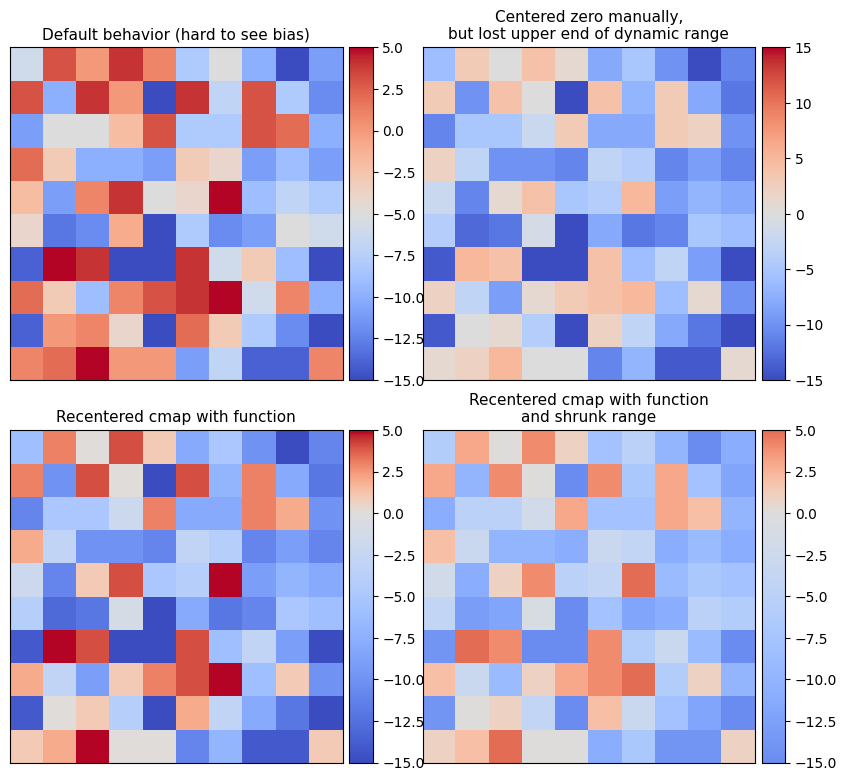

In [2]:
N = 10
fs = 11
biased_data = np.random.random_integers(low=-15, high=5, size=(N,N))

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.75, name='shifted')
shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')

fig = plt.figure(figsize=(10,10))
grid = AxesGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.5,
                label_mode="1", share_all=True,
                cbar_location="right", cbar_mode="each",
                cbar_size="7%", cbar_pad="2%")

# normal cmap
im0 = grid[0].pcolor(biased_data, cmap=orig_cmap)
grid.cbar_axes[0].colorbar(im0)
grid[0].set_title('Default behavior (hard to see bias)', fontsize=fs)

im1 = grid[1].pcolor(biased_data, cmap=orig_cmap, vmax=15, vmin=-15)
grid.cbar_axes[1].colorbar(im1)
grid[1].set_title('Centered zero manually,\nbut lost upper end of dynamic range', fontsize=fs)

im2 = grid[2].pcolor(biased_data, cmap=shifted_cmap)
grid.cbar_axes[2].colorbar(im2)
grid[2].set_title('Recentered cmap with function', fontsize=fs)

im3 = grid[3].pcolor(biased_data, cmap=shrunk_cmap)
grid.cbar_axes[3].colorbar(im3)
grid[3].set_title('Recentered cmap with function\nand shrunk range', fontsize=fs)

for ax in grid:
    ax.set_xlim(left=0, right=N)
    ax.set_ylim(bottom=0, top=N)
    ax.set_yticks([])
    ax.set_xticks([])



In [3]:
my_gradient = [
    # Edit this gradient at https://eltos.github.io/gradient/#5:4C71FF-15:4C71FF-25:4C71FF-35:4C71FF-45:F5F5F5-55:F5F5F5-65:C7030D-75:CD0B15-85:DC1F29-95:FC4A53
    [0.000, '#4C71FF'],
    [0.050, '#4C71FF'],
    [0.150, '#4C71FF'],
    [0.250, '#4C71FF'],
    [0.350, '#4C71FF'],
    [0.450, '#F5F5F5'],
    [0.550, '#F5F5F5'],
    [0.650, '#C7030D'],
    [0.750, '#CD0B15'],
    [0.850, '#DC1F29'],
    [0.950, '#FC4A53'],
    [1.000, '#FC4A53']]

TypeError: unhashable type: 'list'

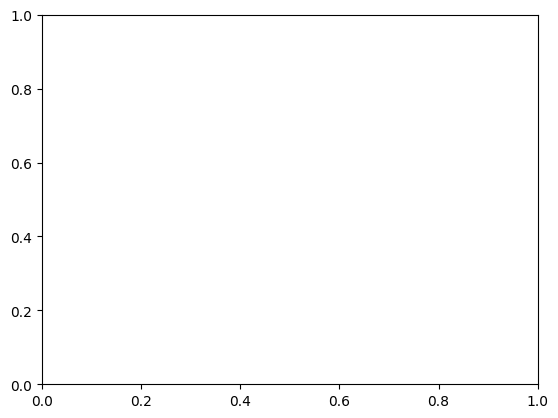

In [4]:
from matplotlib.colors import LinearSegmentedColormap
if __name__ == '__main__':
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.imshow([np.arange(1000)], aspect="auto", cmap=my_gradient)
    plt.show()
